In [120]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


ANN project - Binary classification problem

In [121]:
df=pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")
df.shape

(10000, 14)

In [122]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [123]:
#checking missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [124]:
#checing duplicates
df.duplicated().sum()

0

In [125]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [126]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [127]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [128]:
#removing not in use in cloumns
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [129]:
df.head() 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [130]:
#changing in category and in ones and zeros
df=pd.get_dummies(df,columns=['Geography',"Gender"],dtype=int)

In [131]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [132]:
X=df.drop(columns=['Exited',"Geography_Spain",'Gender_Female'])
y=df['Exited']


In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [134]:
X_train.shape

(8000, 11)

In [135]:
#scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [136]:
X_train_scaled.shape

(8000, 11)

In [137]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [138]:
model = Sequential()

model.add(Dense(11,activation="relu",input_dim=11)) #hidden layer
model.add(Dense(11,activation="relu"))
model.add(Dense(1,activation="sigmoid")) #output layer

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [139]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [140]:
# model.compile(loss="binary_crossentropy",optimizer="Adam")
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [141]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)


Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8009 - loss: 0.4968 - val_accuracy: 0.7975 - val_loss: 0.4688
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7970 - loss: 0.4586 - val_accuracy: 0.8006 - val_loss: 0.4437
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8030 - loss: 0.4370 - val_accuracy: 0.8062 - val_loss: 0.4306
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8232 - loss: 0.4130 - val_accuracy: 0.8112 - val_loss: 0.4230
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8258 - loss: 0.4150 - val_accuracy: 0.8131 - val_loss: 0.4167
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8340 - loss: 0.4013 - val_accuracy: 0.8163 - val_loss: 0.4108
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8300 - loss: 0.4072 - val_accuracy: 0.8206 - val_loss: 0.4045
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8311 - loss: 0.4017 - val_accu

In [142]:
model.layers[1].get_weights()

[array([[ 0.39236218,  0.55955374, -0.13553423,  0.12113313,  0.05869366,
          0.6204965 ,  0.38205212, -0.07397584,  0.4452968 ,  0.50370604,
         -0.1627972 ],
        [ 0.38019586,  0.27467418,  0.05654972, -0.70918787,  0.83454126,
          0.04426761,  0.13251062, -0.0236364 ,  0.58540004, -0.02404438,
         -0.49122015],
        [ 0.03215132,  0.5662615 ,  0.34840384,  0.43619972,  0.36287016,
         -0.03424991,  0.5788925 ,  0.02680001,  0.24292505, -0.2765553 ,
          0.05051217],
        [ 0.05603519,  0.10025693,  0.11193457, -0.9749143 , -1.5930789 ,
          0.09222365, -0.07337002, -0.17974186, -0.37608555, -1.4045714 ,
         -0.29436263],
        [ 0.3134011 ,  0.20432697,  0.01124531,  0.29810494, -0.11240935,
          0.2452541 , -0.33159494, -1.1749438 , -0.3506376 ,  0.42529085,
         -0.9038617 ],
        [ 0.44420296,  0.09657435,  0.43407795,  0.2743293 ,  0.4952086 ,
          0.12328291,  0.68957645, -0.22675642,  0.2932821 , -0.0294641

In [143]:
model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.02726274],
       [0.06447668],
       [0.02340973],
       ...,
       [0.00654426],
       [0.03229201],
       [0.43431994]], dtype=float32)

In [144]:
y_log=model.predict(X_test_scaled) 

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [145]:
y_pred=np.where(y_log>0.5,1,0) #converting a to ones and zeros by taking 0.5 as threshold

In [146]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.867

In [147]:
import matplotlib.pyplot as plt

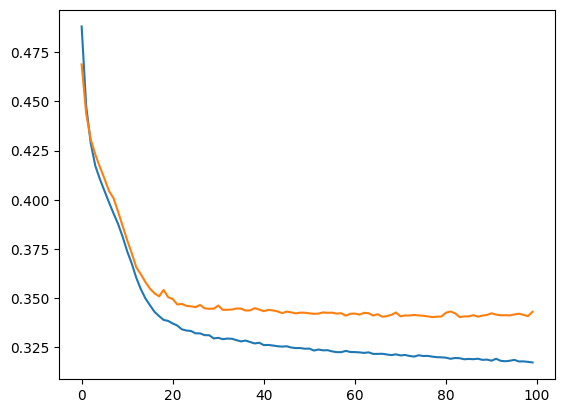

In [148]:
# history.history #training accuracy and loss records
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

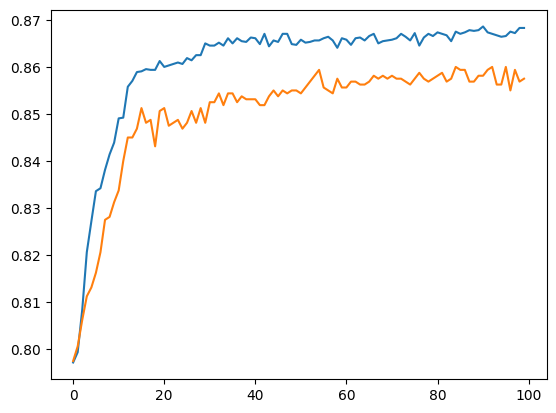

In [149]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])